# Independent Explorations 2

## 1. Importing libraries, data set, and initial checks
## 2. Population stats and outliers
## 3. Correlations between number of billionaires in each country, the final worth of billionaires in each country, and the populations of each country.
## 4. GDP as correlated with the final worth of billionaires in a country.

### 1. Importing libraries, data set, and initial checks

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

In [2]:
# To display charts in the notebook without calling them

%matplotlib inline

In [3]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6\Data'

In [4]:
# Importing data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'billionaires_cleaned.csv'), index_col = False)

In [5]:
# Removing the limit to columns displayed

pd.options.display.max_columns = None

In [6]:
df.head()

,Unnamed: 0,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0
1,1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0
2,2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
3,3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
4,4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0


In [7]:
# Deleting the extra index column

df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0


### 2. I want to compare population against itself to look for outliers.

<Axes: xlabel='population_country', ylabel='population_country'>

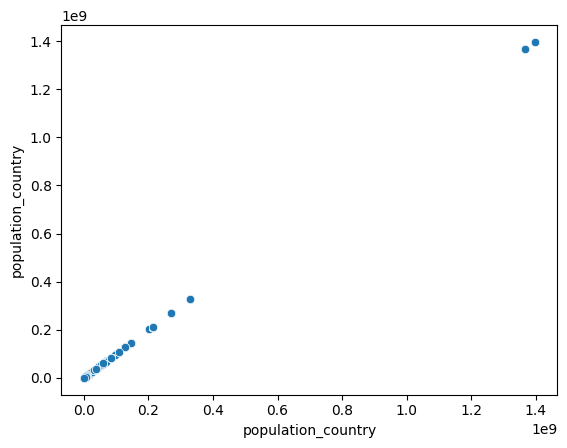

In [9]:
# Population scatterplot

sns.scatterplot(x = 'population_country', y = 'population_country', data = df)

In [18]:
# What countries have the highest populations

df.loc[df['population_country'] > 1_000_000_000, ['country', 'population_country']]

,country,population_country
8,India,1.366418e+09
14,China,1.397715e+09
23,India,1.366418e+09
25,China,1.397715e+09
33,China,1.397715e+09
...,...,...
2633,China,1.397715e+09
2634,China,1.397715e+09
2635,China,1.397715e+09
2637,China,1.397715e+09


### India and China are the population outliers. (China has the highest population.) How many billionaires are in each?

In [14]:
# Filter countries with population over 1 billion and select desired columns
# I received help from chatGPT for the following line of code.

result_table = df.loc[df['population_country'] > 1_000_000_000, ['country', 'country_total']]

In [15]:
result_table

,country,country_total
8,India,157.0
14,China,523.0
23,India,157.0
25,China,523.0
33,China,523.0
...,...,...
2633,China,523.0
2634,China,523.0
2635,China,523.0
2637,China,523.0


### China has 523 billionaires and India has 157.

### 3. Now I want to look for correlations between number of billionaires in each country, the final worth of billionaires in each country, and the populations of each country.

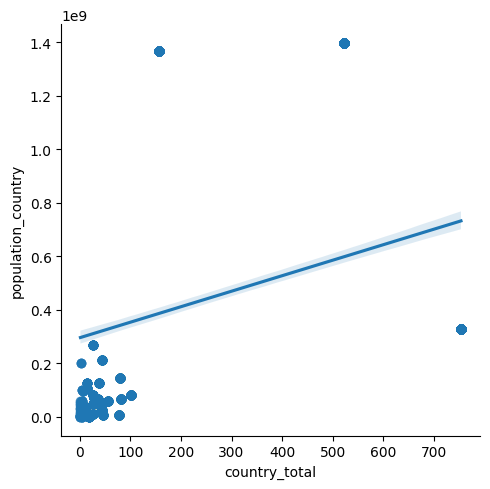

In [19]:
sns.lmplot(x = 'country_total', y = 'population_country', data = df)

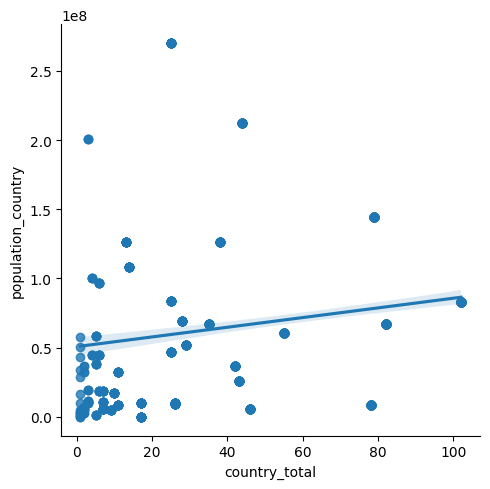

In [20]:
# What happens if we remove the three big outliers?

# Filter the data frame to exclude 'country_total' numbers over 140
filtered_df = df[df['country_total'] <= 140]

# Create the lmplot with the filtered data frame
sns.lmplot(x='country_total', y='population_country', data=filtered_df)

### There is a positive correlation between the population of a country and the number of billionaires in that country. However, it is not very strong and most of the data points are not near the regression line.

### Now I will look at the final worth of billionaires as correlated to the country population.

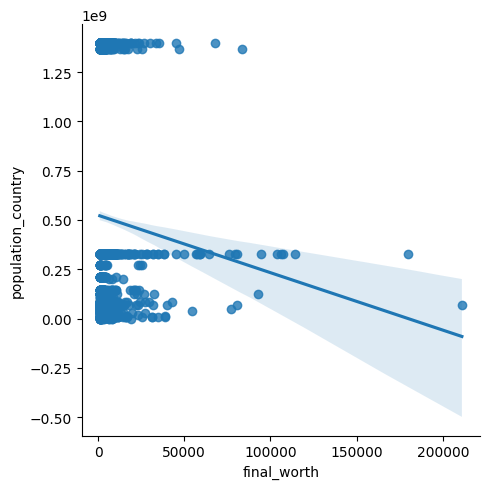

In [21]:
sns.lmplot(x = 'final_worth', y = 'population_country', data = df)

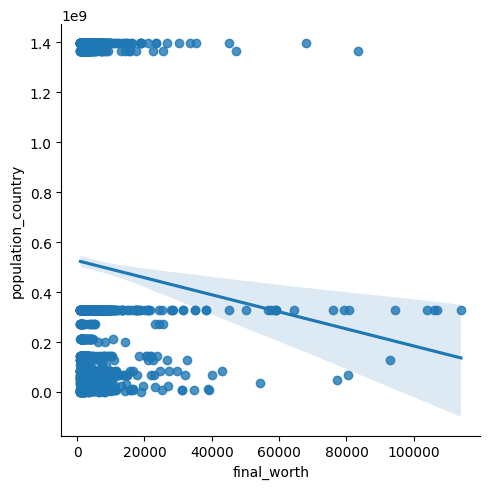

In [23]:
# What happens if we remove the 2 final_worth outliers?

# Filter the data frame to exclude 'final_worth' numbers over 150,000,000,000
filtered_df = df[df['final_worth'] <= 150000]

# Create the lmplot with the filtered data frame
sns.lmplot(x='final_worth', y='population_country', data=filtered_df)

### There is a negative relationship between a billionaire's final worth and the population of their country. However, I believe this is not a significant finding becuase it is influenced by the number of billionaires in the two highest population countries, China and India. The data points themselves seem to be very flat horizontally and aren't trending up or down. It is interesting that there is a large gap in country population where there are no billionaires. Perhaps this is because China and India have populations that are exponentially larger other countries' populations, therefore there are very few countries with populations in between.

### 4. In the previous notebook "Independent Explorations 1," I looked at each country's GDP as correlated with the total number of billionaires in that country. Now I want to look at the GDP as correlated with the final worth of billionaires in a country.

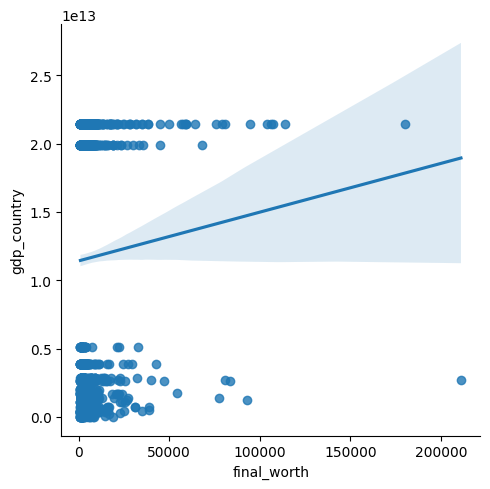

In [24]:
sns.lmplot(x = 'final_worth', y = 'gdp_country', data = df)

In [33]:
# What does this look like if we filter out the two highest 'final_worth' variables and highest 'gdp_country' variables?

# Filter the data frame to exclude 'final_worth' numbers over 150 billion and 'gdp_country' numbers over 10 trillion.
filtered_df = df[(df['final_worth'] <=150000) & (df['gdp_country'] < 10_000_000_000_000)]

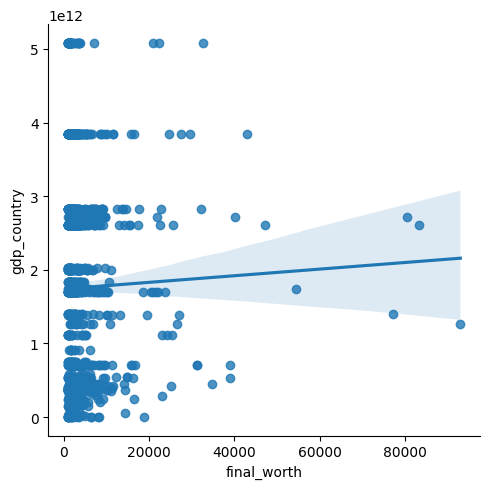

In [34]:
sns.lmplot(x = 'final_worth', y = 'gdp_country', data = filtered_df)

### Just as above when looking at popluation vs. final worth, a billionaire's final worth correlated with their country's GDP is perhaps only weakly positively correlated at best. Most of the positive correlation is caused by a few extreme outliers. Mostly, the data points are flat and do not show a trend in any direction.